#01.Import Libraries

In [28]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

#02.Import Data

In [2]:
#create path
path = r'/Users/juliewhitton/Desktop/Instacart Basket Analysis/'

In [3]:
#import ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [4]:
#check import
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly Busy Days,Average orders,10,New customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least Busy Days,Average orders,10,New customer
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least Busy Days,Most orders,10,New customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Least Busy Days,Average orders,10,New customer
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Least Busy Days,Most orders,10,New customer


#03.Group and Aggregate Data

In [5]:
#find the aggregated mean of the “order_number” column 
ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


#Follow the instructions in the Exercise for creating a loyalty flag for existing customers using the transform() and #loc() functions.

In [6]:
#check shape
ords_prods_merge.shape

(32404859, 20)

In [7]:
#Use the loyalty flag you created and check the basic statistics of the product prices 
#for each loyalty category (Loyal Customer, Regular Customer, and New Customer). 
#What you’re trying to determine is whether the prices of products purchased by loyal customers 
#differ from those purchased by regular or new customers.
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max', 'sum']})

prices                           
                       mean  min      max          sum
loyalty_flag                                          
Loyal customer    10.386336  1.0  99999.0  106814042.2
New customer      13.294670  1.0  99999.0   83011787.2
Regular customer  12.495717  1.0  99999.0  198391693.2

In [8]:
#Create a spending flag for each user based on the average price across all their orders using the following criteria:
#If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
#If the mean of the prices of products purchased by a user is higher than or equal to 10, 
#then flag them as a “High spender.”
ords_prods_merge['avg_spent'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)



In [9]:
#check new column was made
ords_prods_merge[['avg_spent']].head()

,avg_spent
0,6.367797
1,6.367797
2,6.367797
3,6.367797
4,6.367797


In [10]:
#set criteria for spending flag
ords_prods_merge.loc[ords_prods_merge['avg_spent'] < 10, 'spending_flag'] = 'Low spender'
ords_prods_merge.loc[ords_prods_merge['avg_spent'] >= 10, 'spending_flag'] = 'High spender'

In [11]:
#check frequency
ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

In [13]:
#Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the 
#median in the “days_since_prior_order” column. The criteria for the flag should be as follows:
#If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled
#a “Non-frequent customer.” If the median is higher than 10 and lower than or equal to 20, then the customer 
#should be labeled a “Regular customer.” If the median is lower than or equal to 10, then the customer 
#should be labeled a “Frequent customer.”
ords_prods_merge['median_days_since_last_order'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


In [14]:
#check new column
ords_prods_merge[['median_days_since_last_order']].head()

,median_days_since_last_order
0,20.5
1,20.5
2,20.5
3,20.5
4,20.5


In [15]:
#set criteria for freq_flag
ords_prods_merge.loc[ords_prods_merge['median_days_since_last_order'] > 20, 'freq_flag'] = 'Non-frequent customer'
ords_prods_merge.loc[(ords_prods_merge['median_days_since_last_order'] >10) & 
                     (ords_prods_merge['median_days_since_last_order'] <=20), 'freq_flag'] = 'Regular customer'
ords_prods_merge.loc[ords_prods_merge['median_days_since_last_order'] <=10, 'freq_flag'] = 'Frequent customer'

In [16]:
#check frequency
ords_prods_merge['freq_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: freq_flag, dtype: int64

In [18]:
#locate nan values
nan_vals = ords_prods_merge.loc[ords_prods_merge['freq_flag'] == 'NaN']
nan_vals

,order_id,user_id,eval_set,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_days_since_last_order,freq_flag


In [19]:
#Check shape of freq_flag
ords_prods_merge['freq_flag'].value_counts(dropna = False).sum()

32404859

#12345.Copied Data Cleaning code from 4.9

In [20]:
#use describe() function to problem solve
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [24]:
#agg({'prices': ['mean', 'min', 'max', 'sum']})

ords_prods_merge.groupby('department_id').agg({'prices': ['mean', 'median', 'max']})

prices                
                    mean median      max
department_id                           
1               7.736553    7.8     15.0
2               6.990934    6.6     15.0
3               7.853809    7.5     15.0
4               7.981708    7.9     15.0
5               8.143701    7.5     15.0
6               7.682264    6.9     15.0
7               7.680502    7.7     15.0
8               7.889070    7.6     15.0
9               7.350283    6.9     15.0
10              8.348960    6.1     14.1
11              7.996769    7.9     15.0
12             16.294443   17.1     25.0
13              8.009443    7.9     20.0
14              8.028963    8.4     14.9
15              7.539976    6.8     15.0
16             33.479533    8.8  99999.0
17              7.384058    7.4     15.0
18              7.638380    7.2     15.0
19              4.275437    4.2      7.0
20              7.778701    7.5     15.0
21              8.660716    8.4     15.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

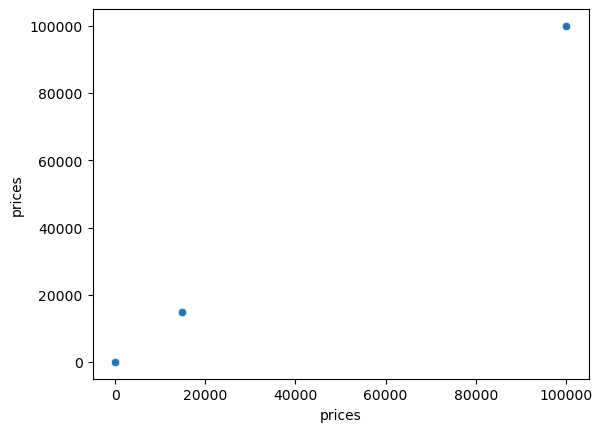

In [27]:
#use scatterplot to investigate

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [29]:
#investigate outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_days_since_last_order,freq_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly Busy Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly Busy Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly Busy Days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest Days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest Days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest Days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest Days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Least Busy Days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Least Busy Days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [30]:
#replace outliers with 'missing'
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [31]:
#check for new max value
ords_prods_merge['prices'].max()

25.0

In [32]:
#check avg_spent
ords_prods_merge['avg_spent'].describe()

count    3.240486e+07
mean     1.198023e+01
std      8.324227e+01
min      1.000000e+00
25%      7.387298e+00
50%      7.824786e+00
75%      8.254023e+00
max      2.500542e+04
Name: avg_spent, dtype: float64

#04.Export df

In [33]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_ords_prods.pkl'))